In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
pip install langdetect

     |████████████████████████████████| 981 kB 7.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0137ebbb8c65d6923a70d7b29521346ac50b967583314292a92aa7c2c1495299
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
#Get the data
!git clone https://github.com/AhmadIbrahim-AI/data-scraping.git

%cd /content/data-scraping
! git pull 

Cloning into 'data-scraping'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 48 (delta 16), reused 41 (delta 9), pack-reused 0
Unpacking objects: 100% (48/48), done.
/content/data-scraping
Already up to date.


In [ ]:

import pandas as pd
import glob

path = '/content/data-scraping/User Reviews' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

reviews = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
reviews.shape

(83957, 4)

In [ ]:
print(np.mean(reviews['USER SCORE']))

7.5554695316594405


In [32]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
#Language detection library ported from Google's language-detection.
from langdetect import detect_langs


english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

def clean_review(text):
  # convert to lower case
  text = text.lower()
  
  try:
     res = detect_langs(text)
     for item in res:
      if  item.lang != "en":
        text='deleted'
  except:
    text='deleted'

  # remove none alphabetic characters
  text = re.sub(r'[^a-z]', ' ', text)

  # stem words 
  # split into words
  tokens = word_tokenize(text)

  # stemming of words
  stemmed = [stemmer.stem(word) for word in tokens]

  text = ' '.join(stemmed)

  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in english_stopwords])


  return text

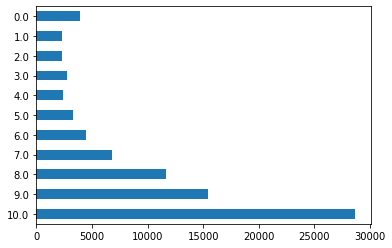

In [ ]:
reviews['USER SCORE'].value_counts().sort_index(ascending=False).plot(kind='barh')

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83957 entries, 0 to 83956
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        83957 non-null  int64  
 1   Title         83957 non-null  object 
 2   User Reviews  83957 non-null  object 
 3   USER SCORE    83956 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
#text Cleaning
print(reviews['User Reviews'][20])

I was astonished that a script like this, where the dialogue is mostly an exchange of platitudes, would get made. The characters are mostly caricatures.  Other than one young woman who's so unbearably smug she deserves a category of her own, we have the stilted, on the one hand, and the pretentious, on the other, including Emily herself. Having a voiceover of her reading her poetry only added to the preciousness of this film; and the absence of a score adds to an airless, claustrophobic atmosphere that might have been deliberate, in order to demonstrate the repression of the times, but in the end deprived all of them - with one possible exception, the Jennifer Ehle sister - of their humanity.  I can't understand the high critical rating. Instead of bringing poetry to life, it suffocates it, which is a real loss, considering the power of the work of this poet who managed to achieve a status as a writer rarely given to women of her time - or ours.  Cynthia Nixon tries; if anyone could pu

In [ ]:
# apply to all dataset
reviews['clean_review'] = reviews['User Reviews'].apply(clean_review)
reviews.head() 

In [ ]:
reviews[reviews['clean_review']=='delet'].shape

(4442, 5)

In [ ]:
reviews.drop(reviews[reviews['clean_review']=='delet'].index, inplace=True)
reviews.drop(reviews[reviews['clean_review']==''].index, inplace=True)

In [ ]:
reviews

,Number,Title,User Reviews,USER SCORE,clean_review
0,2002,Meru,"If it were a work of fiction or even ""based on...",8.0,work fiction even base real event would say wa...
1,2002,Meru,As breathtaking as the real altitude climb. Ap...,9.0,breathtak real altitud climb appreci meru rare...
2,2002,Meru,"This is a great story, that is never boring. T...",10.0,thi great stori never bore thi documentari enc...
3,2002,Meru,An excellent documentary about the ascent of t...,8.0,excel documentari ascent holi grail mountain c...
4,2002,Meru,"Meru is one of 2015's best films, simply put. ...",10.0,meru one best film simpli put thi miss big scr...
...,...,...,...,...,...
83950,1500,Central Station,"""Central Station"" is a masterpiece where Walte...",10.0,central station masterpiec walter sall join hi...
83951,1500,Central Station,This a terribly amateurish boring movie that ...,1.0,thi terribl amateurish bore movi would wish an...
83953,1500,Central Station,Enjoyable portrait of the universal search fo...,7.0,enjoy portrait univers search famili
83954,1500,Central Station,Very deep. A beautiful and touch history.,10.0,veri deep beauti touch histori


In [ ]:
#text Cleaning comparaision
print(reviews['User Reviews'][1],reviews['USER SCORE'][1])
print(reviews['clean_review'][1])

 I have never seen one and the same movie more than twice in the theatre before. But Whale Rider changed my mind. It really is a magnificent masterpiece and sureley made for the whole family. I watched it 7 times in the cinema and i am into it still today. Niki Caro was so lucky to find and choose this natural Keisha Castle Hughes. Very, very impressive the whole story and the actors and actresses. Everybody who really understand the plot of Whale Rider can't give less then 9 rating...! 10.0
never seen one movi twice theatr befor whale rider chang mind realli magnific masterpiec sureley made whole famili watch time cinema still today niki caro wa lucki find choos thi natur keisha castl hugh veri veri impress whole stori actor actress everybodi realli understand plot whale rider give less rate


In [ ]:
#assign sentiment  based on user score Greater than 5 it will be considered as positive
reviews['sentiment'] = np.where((reviews['USER SCORE'] > 5), 1, 0)

In [ ]:
reviews['sentiment'].value_counts()

1    63134
0    16375
Name: sentiment, dtype: int64

In [ ]:
#Select equal reviews 
positive_reviews=reviews[(reviews['USER SCORE'] > 5)] .sample(n=16300)
negative_reviews=reviews[(reviews['USER SCORE'] <= 5)] .sample(n=16300)
selected_reviews=pd.concat([positive_reviews,negative_reviews], ignore_index=True)

In [ ]:
selected_reviews.to_csv('selected_reviews.csv',index=False)

## **To not rerun each time the above code**

In [5]:
#To not rerun each time the above code
import pandas as pd
selected_reviews=pd.read_csv("/content/data-scraping/selected_reviews.csv")

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
 
X = selected_reviews['clean_review'].values
y = selected_reviews['sentiment'].values

# Split data into 50% training & 50% test
# let's all use a random state of 42 for example to ensure having the same split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(22820,) (22820,)
(9780,) (9780,)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

# define a CountVectorizer (with binary=True and max_features=20000)
vectorizer = CountVectorizer(binary=True, max_features=500)  

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train)  

# transform x_train to bag of words
x_train_bow = vectorizer.transform(x_train)  
x_test_bow = vectorizer.transform(x_test)   

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_train_bow, y_train)
# print(X_res.shape, y_res.shape)
# print(x_test_bow.shape, y_test.shape)

In [ ]:
x_train_bow.toarray().shape

(22820, 500)

In [ ]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
logmodel = LogisticRegression()

# train the classifier on the training data
logmodel.fit(x_train_bow, y_train)

# get the mean accuracy on the training data
acc_train = logmodel.score(x_train_bow, y_train)  

print('Training Accuracy:', acc_train)

Training Accuracy: 0.842638036809816


In [ ]:
# Evaluate model with test data

acc_test = logmodel.score(x_test_bow, y_test)  
print('Test Accuracy:', acc_test)

Test Accuracy: 0.8343558282208589


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=logmodel.predict(x_test_bow)
confusion_matrix(y_test, y_pred)

array([[3993,  828],
       [ 792, 4167]])

In [ ]:
Missclassified = pd.DataFrame(columns=['User Review','User Score','Predicted','Real'])
for x_test, y_pred, y_test in zip(x_test, y_pred, y_test):
  if y_pred != y_test:
    index=selected_reviews.index[selected_reviews['clean_review']==x_test].tolist()
    Missclassified = Missclassified.append({ "User Review":selected_reviews['User Reviews'][index[0]],"User Score": selected_reviews['USER SCORE'][index[0]], "Predicted":y_pred,"Real":y_test},ignore_index=True)


In [ ]:
Missclassified.to_csv('logMissclassified.csv',index=False)

In [ ]:
# define predict function
def predict(model, vectorizer, review):
    review = clean_review(review)
    review_bow = vectorizer.transform([review])
    return model.predict(review_bow)[0]

#**ANALYSE OF MISSCLASSIFIED BY LOGISTIC REGRESSION**

In [ ]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 10.
review ='''
#1 on my list. Won't even try to explain why. Just please watch it - by yourself. This really is an experience you don't want ruined by small talk etc. Enjoy!
'''
predict(logmodel, vectorizer, review)

0

In [ ]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 10.
review ='''
 I absolutely adore this movie. It is entirely original, no matter what anyone says. Joseph Gordon-Levitt and Zooey Deschanel were great as the doomed lovers, though I began to hate Summer as the movie progressed.
'''
predict(logmodel, vectorizer, review)

0

In [ ]:
 #here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 0.
review ='''
  Probably great for ages 6-12. If you are 13 or over, don't go because your snoring will probably disturb the kids.
'''
predict(logmodel, vectorizer, review)

1

In [ ]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 0.
review ='''
  Are you kidding? this is one of the best out of hollywood? truely sucked, what's the sequel gonna be called? no country for old women? can't remember the last movie i hated so much.
'''
predict(logmodel, vectorizer, review)

1

Epoch 1/20
160/160 [==============================] - 2s 5ms/step - loss: 0.6548 - accuracy: 0.6862 - val_loss: 0.5338 - val_accuracy: 0.8209
Epoch 2/20
160/160 [==============================] - 1s 3ms/step - loss: 0.4733 - accuracy: 0.8028 - val_loss: 0.4089 - val_accuracy: 0.8318
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8188 - val_loss: 0.3947 - val_accuracy: 0.8357
Epoch 4/20
160/160 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8303 - val_loss: 0.3845 - val_accuracy: 0.8345
Epoch 5/20
160/160 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8326 - val_loss: 0.3798 - val_accuracy: 0.8338
Epoch 6/20
160/160 [==============================] - 0s 3ms/step - loss: 0.3794 - accuracy: 0.8370 - val_loss: 0.3774 - val_accuracy: 0.8355
Epoch 7/20
160/160 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8406 - val_loss: 0.3774 - val_accuracy: 0.8344
Epoch 

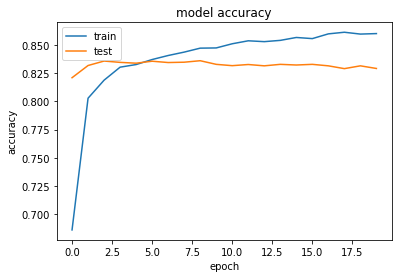

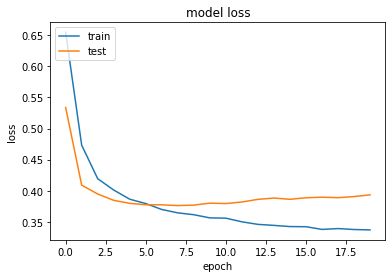

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy

# create model
model = Sequential()
model.add(Dense(8, input_dim=500, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and retrieve the training history
training_history = model.fit(x_train_bow.toarray(), y_train , validation_split=0.3, epochs=20, batch_size=100, verbose=1)

# list all data in history
print(training_history.history.keys())

# summarize history for training and validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 10.
review ='''
#1 on my list. Won't even try to explain why. Just please watch it - by yourself. This really is an experience you don't want ruined by small talk etc. Enjoy!
'''
predict(model, vectorizer, review)

array([0.49346933], dtype=float32)

In [ ]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 10.
review ='''
 I absolutely adore this movie. It is entirely original, no matter what anyone says. Joseph Gordon-Levitt and Zooey Deschanel were great as the doomed lovers, though I began to hate Summer as the movie progressed.
'''
predict(model, vectorizer, review)

array([0.65228385], dtype=float32)

In [ ]:
 #here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 0.
review ='''
  Probably great for ages 6-12. If you are 13 or over, don't go because your snoring will probably disturb the kids.
'''
predict(model, vectorizer, review)

array([0.77344203], dtype=float32)

In [ ]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 0.
review ='''
  Are you kidding? this is one of the best out of hollywood? truely sucked, what's the sequel gonna be called? no country for old women? can't remember the last movie i hated so much.
'''
predict(model, vectorizer, review)

array([0.85245466], dtype=float32)

As a result with bag of words method still we have the same issues in both models as the context is not into consideration using this method.

#Deep Sentiment Analysis

In [93]:
#To not rerun each time the above code
import pandas as pd
selected_reviews=pd.read_csv("/content/data-scraping/selected_reviews.csv")

In [94]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
 
X = selected_reviews['clean_review'].values
y = selected_reviews['sentiment'].values

# Split data into 50% training & 50% test
# let's all use a random state of 42 for example to ensure having the same split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(22820,) (22820,)
(9780,) (9780,)


In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# define your tokenizer (with num_words=10000)
#the ids of the most 10000 frequent words is returned
tokenizer_obj = Tokenizer(num_words=10000)

# assign an index (number) to each word using fit_on_texts function  
tokenizer_obj.fit_on_texts(x_train)

# will be used later to pad sequences
max_length = 100

# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1
print(vocab_size)

# transform each text to a sequence of integers (to be used later in embeddings layer)
X_train_tokens =  tokenizer_obj.texts_to_sequences(x_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(x_test)

# apply post-padding to the sequences
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

29781


In [96]:
x_train[110], X_train_pad[110]

('score show veri mix feel thi movi consid classic onli discov thi week make veri difficult bridg fifti year gap genesi veri first look said still even partial comprehend whi thi featur import heart mani yet case cours space odyssey benefit except visual sequenc stage ye colour light perspect montag outstand obvious soundtrack realli intens add lot stori seem even sound environ reveal quit lot kubrick megalomania conceptu thi movi undeni act even repres work great conclud posit aspect would say messag behind thi featur realli interest despit asset ruin experi wa amongst movi length total get concept space time realli close repres fact movi requir silenc veri dark sequenc much saw first ten minut know mean stori way confus event succeed without ani obviou link explan kubrick manag make us deduc symbol caus event also surprisingli manag make hi movi unintellig messi wit twenti last minut know talk overal third fourth act simpli mindnumb addit punctuat thi endless weird psychedel sequenc 

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 100

# FILL BLANKS
# build the neural network
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation="sigmoid"))

# compile model: assign loss & optimizer
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          2978100   
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 3,095,477
Trainable params: 3,095,477
Non-trainable params: 0
_________________________________________________________________


In [98]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(X_train_pad, y_train, batch_size=30, epochs=150, validation_data=(X_test_pad, y_test), verbose=1, callbacks=[es, mc])

Epoch 1/150
761/761 [==============================] - 135s 175ms/step - loss: 0.6628 - accuracy: 0.5888 - val_loss: 0.6591 - val_accuracy: 0.5836

Epoch 00001: val_accuracy improved from -inf to 0.58364, saving model to best_model.h5
Epoch 2/150
761/761 [==============================] - 134s 176ms/step - loss: 0.6285 - accuracy: 0.6265 - val_loss: 0.6230 - val_accuracy: 0.6982

Epoch 00002: val_accuracy improved from 0.58364 to 0.69816, saving model to best_model.h5
Epoch 3/150
761/761 [==============================] - 135s 177ms/step - loss: 0.5986 - accuracy: 0.6595 - val_loss: 0.5515 - val_accuracy: 0.7546

Epoch 00003: val_accuracy improved from 0.69816 to 0.75460, saving model to best_model.h5
Epoch 4/150
761/761 [==============================] - 131s 173ms/step - loss: 0.5080 - accuracy: 0.7631 - val_loss: 0.5436 - val_accuracy: 0.7647

Epoch 00004: val_accuracy improved from 0.75460 to 0.76472, saving model to best_model.h5
Epoch 5/150
761/761 [==============================

KeyboardInterrupt: ignored

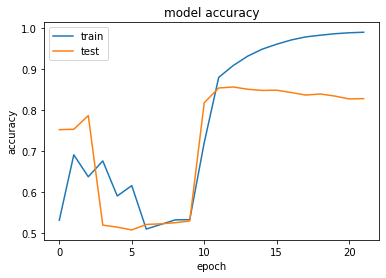

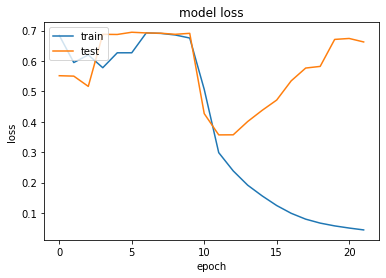

In [72]:

# summarize history for training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 10.
review ='''
#1 on my list. Won't even try to explain why. Just please watch it - by yourself. This really is an experience you don't want ruined by small talk etc. Enjoy!
'''
review1=[clean_review(review)]
X_train_tokens =  tokenizer_obj.texts_to_sequences(review1)
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
model.predict(x=X_train_pad)

array([[0.03354374]], dtype=float32)

In [56]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 10.
review ='''
 I absolutely adore this movie. It is entirely original, no matter what anyone says. Joseph Gordon-Levitt and Zooey Deschanel were great as the doomed lovers, though I began to hate Summer as the movie progressed.
'''
review1=[clean_review(review)]
X_train_tokens =  tokenizer_obj.texts_to_sequences(review1)
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
model.predict(x=X_train_pad)

array([[0.99857163]], dtype=float32)

In [57]:
 #here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 0.
review ='''
  Probably great for ages 6-12. If you are 13 or over, don't go because your snoring will probably disturb the kids.
'''
review1=[clean_review(review)]
X_train_tokens =  tokenizer_obj.texts_to_sequences(review1)
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
model.predict(x=X_train_pad)

array([[0.98745465]], dtype=float32)

In [58]:
#here where  bag of words model is not functioning well as context is not taken into consideration. the user review here is 0.
review ='''
  Are you kidding? this is one of the best out of hollywood? truely sucked, what's the sequel gonna be called? no country for old women?   the last movie i hated so much.
'''
review1=[clean_review(review)]
X_train_tokens =  tokenizer_obj.texts_to_sequences(review1)
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
model.predict(x=X_train_pad)

array([[0.9249489]], dtype=float32)

In [59]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_pad)
a = np.where(y_pred > 0.5, 1, 0)
confusion_matrix(y_test, a)


array([[3957,  864],
       [ 779, 4180]])